In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import scipy as sp
from io import StringIO

In [2]:
data = pd.read_csv('tornadoes-multiclass.csv')

In [3]:
X = preprocessing.scale(data.drop(['multiclass_casualties'],axis = 1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [4]:
Y = data['multiclass_casualties']

In [7]:
# apply SMOTE only to training set, test set does not have to be balanced
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
sm = SMOTE(sampling_strategy='not majority')

In [15]:
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

In [17]:
# Simple Logistic Regression

lr = LogisticRegression().fit(x_train_balanced, y_train_balanced)
lr_pred = lr.predict(x_test)
#lr_pred_prob = lr.predict_proba(x_test)[:,1]
#lr_pred_prob

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([0.60927304, 0.32389063, 0.08744249, ..., 0.43203478, 0.1174586 ,
       0.21970702])

In [20]:
accuracy_score(y_test,lr_pred)

0.8284933378886231

In [25]:
array = confusion_matrix(y_test, lr_pred)

In [28]:
[array[i]/sum(array[i]) for i in range(len(array))]

[array([0.8584661, 0.1170804, 0.0244535]),
 array([0.32653061, 0.45408163, 0.21938776]),
 array([0.03125, 0.375  , 0.59375])]

### List of models:
    1) Decision Tree - Sree
    2) SVM - Orion
    3) Logistic Regression - Orion
    4) K Nearest Neighbors - Zane
    5) Random Forest - Sree
    5) Neural Net? - Sree?
  

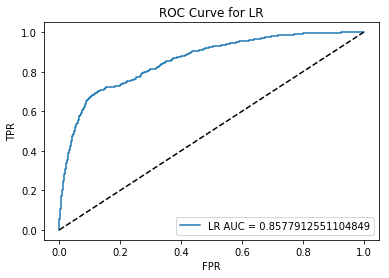

In [41]:
# # ROC curve and AUC for simple Logistic Regression

# plt.plot(lr_fpr, lr_tpr, label='LR AUC = '+str(lr_auc))
# plt.plot([0,1],[0,1], 'k--')
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC Curve for LR')
# plt.legend()
# plt.show()